Load the necessary python libraries for cleaning and exploration.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import pickle
import re
plt.rcParams['text.color'] = 'gray'
plt.rcParams['axes.labelcolor'] = 'gray'
plt.rcParams['xtick.color'] = 'gray'
plt.rcParams['ytick.color'] = 'gray'

Create a dataframe, "data", of the radar and satelite data from the UCI machine learning library.

In [2]:
raw_data = pd.read_csv('WinnipegDataset.txt')

Explore the characteristics of the dataset.

In [3]:
raw_data.head()

,label,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174
0,1,-13.559,-21.407,-11.4040,-15.248,-11.923,-15.291,-2.1548,-7.8474,-10.0020,...,0.18519,0.72602,5.3333,6.000000,0.29489,9.77780,2.44440,1.67700,0.20988,0.65422
1,1,-12.802,-20.335,-10.3990,-14.132,-11.096,-14.361,-2.4039,-7.5330,-9.9369,...,0.33333,-0.48751,2.1111,0.098765,0.83333,0.33333,0.33333,0.84869,0.50617,-0.18898
2,1,-12.431,-19.902,-10.0740,-13.598,-10.829,-14.048,-2.3566,-7.4717,-9.8283,...,0.25926,0.25298,2.2222,0.172840,0.68889,0.88889,0.66667,1.27300,0.30864,0.10483
3,1,-12.689,-19.529,-10.0280,-13.350,-11.056,-14.014,-2.6611,-6.8396,-9.5006,...,0.16049,0.43750,4.1111,0.320990,0.83333,0.33333,0.33333,1.14910,0.38272,0.41603
4,1,-12.686,-19.278,-9.8185,-13.108,-10.932,-13.939,-2.8675,-6.5919,-9.4594,...,0.18519,0.35000,4.0000,0.444440,0.68889,0.88889,0.66667,1.58110,0.20988,0.50000


In [4]:
raw_data.describe()

,label,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174
count,325834.000000,325834.000000,325834.000000,325834.000000,325834.00000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,...,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000
mean,4.062421,-15.143602,-24.026035,-15.400034,-18.59383,-14.493472,-18.427329,0.256432,-8.882434,-8.626002,...,0.433834,0.329085,2.171177,0.080138,0.919604,0.174447,0.162900,0.403288,0.764646,0.667567
std,1.604617,3.504255,4.054214,3.267857,3.71163,3.189013,3.675741,1.682060,1.204040,2.002658,...,0.245857,0.442008,1.284653,0.182628,0.105953,0.373726,0.222008,0.480141,0.273847,0.471260
min,1.000000,-23.971000,-34.308000,-23.161000,-27.24500,-22.103000,-26.897000,-5.582600,-16.389000,-16.558000,...,0.111110,-1.000000,0.000000,0.000000,0.106190,0.000000,0.000000,-0.000000,0.111110,-1.000000
25%,3.000000,-17.848000,-27.119000,-17.563000,-21.44900,-16.989000,-21.450000,-1.037800,-9.658500,-10.070000,...,0.259260,0.000000,1.000000,0.000000,0.833330,0.000000,0.000000,0.000000,0.506170,0.357140
50%,4.000000,-15.992000,-25.064000,-16.164000,-19.58800,-15.099000,-19.282000,0.309180,-8.915900,-8.733100,...,0.358020,0.357140,2.000000,0.000000,1.000000,0.000000,0.000000,-0.000000,1.000000,1.000000
75%,6.000000,-11.786000,-20.387000,-13.427000,-15.65000,-11.735000,-15.514000,1.558200,-8.190200,-7.158100,...,0.506170,0.661440,3.000000,0.172840,1.000000,0.333330,0.333330,0.848690,1.000000,1.000000
max,7.000000,2.535600,-7.589100,1.104000,0.77491,-0.887390,0.951780,7.029900,-1.175400,-0.924610,...,1.000000,1.000000,12.444000,25.951000,1.000000,66.667000,6.666700,2.197200,1.000000,1.000000


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325834 entries, 0 to 325833
Columns: 175 entries, label to f174
dtypes: float64(169), int64(6)
memory usage: 435.0 MB


Cannot tell if there are missing values from .info(). Create a list of dataframe column names and run those names through a for loop to filter and check each column individually for missing/null values.

In [6]:
cols = list(raw_data.columns)

In [7]:
for col in cols:
    null_vals = []
    if raw_data[col].notnull().count() < 325834:
        null_vals.append(col)

print(null_vals)

[]


There are no null values, however the column names are not the names of the features. Scrape the actual feature names from UCI webpage and set them equal to the column names.

In [8]:
url = 'http://archive.ics.uci.edu/ml/datasets/Crop+mapping+using+fused+optical-radar+data+set'

In [9]:
r = requests.get(url)

In [10]:
html_doc = r.text

In [11]:
soup = BeautifulSoup(html_doc, 'html.parser')

In [12]:
soup


<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.01 Transitional//EN\">

<html>
<head>
<title>UCI Machine Learning Repository: Crop mapping using fused optical-radar data set Data Set</title>
<!-- Stylesheet link -->
<link href="../assets/ml.css" rel="stylesheet" type="text/css"/>
<script language="JavaScript" type="text/javascript">
<!--
function checkform ( form )
{
  // see http://www.thesitewizard.com/archive/validation.shtml
  // for an explanation of this script and how to use it on your
  // own website

  // ** START **
  if (form.q.value == "")
  {
    alert( "Please enter search terms." );
    form.q.focus();
    return false ;
  }

  if (getCheckedValue(form.sitesearch) == "ics.uci.edu" && form.q.value.indexOf("site:archive.ics.uci.edu/ml") == -1)
  {
    form.q.value = form.q.value + " site:archive.ics.uci.edu/ml";
  }

  // ** END **
  return true ;
}

// return the value of the radio button that is checked
// return an empty string if none are checked, or
// there are no radio

In [13]:
features = soup.find_all('p', class_='normal')[21]

In [14]:
features

<p class="normal">175 attributes including:
<br/>      1- class;
<br/>      2- f1 to f49:Polarimetric features on 05 July 2012;
<br/>      3- f50 to f98:Polarimetric features on 14 July 2012;
<br/>      4- f99 to f136:Optical features on 05 July 2012;
<br/>      5- f137 to f174:Optical features on 14 July 2012;
<br/> <br/>Details:
<br/>label:crop type class
<br/>f1:sigHH_Rad05July
<br/>f2:sigHV_Rad05July
<br/>f3:sigVV_Rad05July
<br/>f4:sigRR_Rad05July
<br/>f5:sigRL_Rad05July
<br/>f6:sigLL_Rad05July
<br/>f7:Rhhvv_Rad05July
<br/>f8:Rhvhh_Rad05July
<br/>f9:Rhvvv_Rad05July
<br/>f10:Rrrll_Rad05July
<br/>f11:Rrlrr_Rad05July
<br/>f12:Rrlll_Rad05July
<br/>f13:Rhh_Rad05July
<br/>f14:Rhv_Rad05July
<br/>f15:Rvv_Rad05July
<br/>f16:Rrr_Rad05July
<br/>f17:Rrl_Rad05July
<br/>f18:Rll_Rad05July
<br/>f19:Ro12_Rad05July
<br/>f20:Ro13_Rad05July
<br/>f21:Ro23_Rad05July
<br/>f22:Ro12cir_Rad05July
<br/>f23:Ro13cir_Rad05July
<br/>f24:Ro23cir_Rad05July
<br/>f25:l1_Rad05July
<br/>f26:l2_Rad05July
<br/>f27:l3_Ra

In [15]:
features.get_text()

'175 attributes including:\r      1- class;\r      2- f1 to f49:Polarimetric features on 05 July 2012;\r      3- f50 to f98:Polarimetric features on 14 July 2012;\r      4- f99 to f136:Optical features on 05 July 2012;\r      5- f137 to f174:Optical features on 14 July 2012;\r Details:\rlabel:crop type class\rf1:sigHH_Rad05July\rf2:sigHV_Rad05July\rf3:sigVV_Rad05July\rf4:sigRR_Rad05July\rf5:sigRL_Rad05July\rf6:sigLL_Rad05July\rf7:Rhhvv_Rad05July\rf8:Rhvhh_Rad05July\rf9:Rhvvv_Rad05July\rf10:Rrrll_Rad05July\rf11:Rrlrr_Rad05July\rf12:Rrlll_Rad05July\rf13:Rhh_Rad05July\rf14:Rhv_Rad05July\rf15:Rvv_Rad05July\rf16:Rrr_Rad05July\rf17:Rrl_Rad05July\rf18:Rll_Rad05July\rf19:Ro12_Rad05July\rf20:Ro13_Rad05July\rf21:Ro23_Rad05July\rf22:Ro12cir_Rad05July\rf23:Ro13cir_Rad05July\rf24:Ro23cir_Rad05July\rf25:l1_Rad05July\rf26:l2_Rad05July\rf27:l3_Rad05July\rf28:H_Rad05July\rf29:A_Rad05July\rf30:a_Rad05July\rf31:HA_Rad05July\rf32:H1mA_Rad05July\rf33:1mHA_Rad05July\rf34:1mH1mA_Rad05July\rf35:PH_Rad05July\r

In [16]:
features_list = re.split('\r', features.get_text())
features_list

['175 attributes including:',
 '      1- class;',
 '      2- f1 to f49:Polarimetric features on 05 July 2012;',
 '      3- f50 to f98:Polarimetric features on 14 July 2012;',
 '      4- f99 to f136:Optical features on 05 July 2012;',
 '      5- f137 to f174:Optical features on 14 July 2012;',
 ' Details:',
 'label:crop type class',
 'f1:sigHH_Rad05July',
 'f2:sigHV_Rad05July',
 'f3:sigVV_Rad05July',
 'f4:sigRR_Rad05July',
 'f5:sigRL_Rad05July',
 'f6:sigLL_Rad05July',
 'f7:Rhhvv_Rad05July',
 'f8:Rhvhh_Rad05July',
 'f9:Rhvvv_Rad05July',
 'f10:Rrrll_Rad05July',
 'f11:Rrlrr_Rad05July',
 'f12:Rrlll_Rad05July',
 'f13:Rhh_Rad05July',
 'f14:Rhv_Rad05July',
 'f15:Rvv_Rad05July',
 'f16:Rrr_Rad05July',
 'f17:Rrl_Rad05July',
 'f18:Rll_Rad05July',
 'f19:Ro12_Rad05July',
 'f20:Ro13_Rad05July',
 'f21:Ro23_Rad05July',
 'f22:Ro12cir_Rad05July',
 'f23:Ro13cir_Rad05July',
 'f24:Ro23cir_Rad05July',
 'f25:l1_Rad05July',
 'f26:l2_Rad05July',
 'f27:l3_Rad05July',
 'f28:H_Rad05July',
 'f29:A_Rad05July',
 'f30

In [17]:
column_dict = {re.split(':', i)[0]:re.split(':',i)[1] for i in features_list[7:-1]}

In [18]:
column_dict['label'] = 'crop'

In [19]:
raw_data.columns = column_dict.values()

In [20]:
raw_data.head(1)

,crop,sigHH_Rad05July,sigHV_Rad05July,sigVV_Rad05July,sigRR_Rad05July,sigRL_Rad05July,sigLL_Rad05July,Rhhvv_Rad05July,Rhvhh_Rad05July,Rhvvv_Rad05July,...,SecMomPC1_Opt14July,CorPC1_Opt14July,MeanPC2_Opt14July,VarPC2_Opt14July,HomPC2_Opt14July,ConPC2_Opt14July,DisPC2_Opt14July,EntPC2_Opt14July,SecMomPC2_Opt14July,CorPC2_Opt14July
0,1,-13.559,-21.407,-11.404,-15.248,-11.923,-15.291,-2.1548,-7.8474,-10.002,...,0.18519,0.72602,5.3333,6.0,0.29489,9.7778,2.4444,1.677,0.20988,0.65422


In [21]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325834 entries, 0 to 325833
Columns: 175 entries, crop to CorPC2_Opt14July
dtypes: float64(169), int64(6)
memory usage: 435.0 MB


The data is now in a format that is ready for EDA. It can thus be saved as pickle file to avoid having to rerun the initial cleaning and processing steps.

In [4]:
def pickling_function(pickle_object):
    pickle_name = input('Provide a filename: ')
    with open(f'{pickle_name}', 'wb') as f:
        pickle.dump(pickle_object, f)

    pickle_in = open(f'{pickle_name}', 'rb')
    pickled = pickle.load(pickle_in)
    return pickled

In [23]:
pickling_function(raw_data)

,crop,sigHH_Rad05July,sigHV_Rad05July,sigVV_Rad05July,sigRR_Rad05July,sigRL_Rad05July,sigLL_Rad05July,Rhhvv_Rad05July,Rhvhh_Rad05July,Rhvvv_Rad05July,...,SecMomPC1_Opt14July,CorPC1_Opt14July,MeanPC2_Opt14July,VarPC2_Opt14July,HomPC2_Opt14July,ConPC2_Opt14July,DisPC2_Opt14July,EntPC2_Opt14July,SecMomPC2_Opt14July,CorPC2_Opt14July
0,1,-13.55900,-21.4070,-11.40400,-15.24800,-11.92300,-15.29100,-2.15480,-7.8474,-10.0020,...,0.18519,0.726020,5.3333,6.000000,0.29489,9.77780,2.44440,1.67700,0.20988,0.65422
1,1,-12.80200,-20.3350,-10.39900,-14.13200,-11.09600,-14.36100,-2.40390,-7.5330,-9.9369,...,0.33333,-0.487510,2.1111,0.098765,0.83333,0.33333,0.33333,0.84869,0.50617,-0.18898
2,1,-12.43100,-19.9020,-10.07400,-13.59800,-10.82900,-14.04800,-2.35660,-7.4717,-9.8283,...,0.25926,0.252980,2.2222,0.172840,0.68889,0.88889,0.66667,1.27300,0.30864,0.10483
3,1,-12.68900,-19.5290,-10.02800,-13.35000,-11.05600,-14.01400,-2.66110,-6.8396,-9.5006,...,0.16049,0.437500,4.1111,0.320990,0.83333,0.33333,0.33333,1.14910,0.38272,0.41603
4,1,-12.68600,-19.2780,-9.81850,-13.10800,-10.93200,-13.93900,-2.86750,-6.5919,-9.4594,...,0.18519,0.350000,4.0000,0.444440,0.68889,0.88889,0.66667,1.58110,0.20988,0.50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325829,7,2.48230,-7.6870,1.07950,0.74318,-0.94070,0.90493,1.40280,-10.1690,-8.7665,...,0.13580,0.760800,2.3333,0.222220,0.88889,0.22222,0.22222,1.06090,0.35802,0.63246
325830,7,2.52340,-7.6745,1.08680,0.76189,-0.91177,0.93663,1.43660,-10.1980,-8.7614,...,0.13580,-0.383990,6.0000,10.444000,0.12684,19.55600,4.00000,2.19720,0.11111,0.81224
325831,7,-1.92700,-11.4160,-2.43540,-3.45370,-4.15130,-3.48100,0.50845,-9.4886,-8.9802,...,0.13580,0.754830,2.3333,0.222220,0.83333,0.33333,0.33333,1.27300,0.30864,0.31623
325832,7,0.12483,-10.1440,-0.62193,-1.54210,-2.31000,-1.52500,0.74676,-10.2690,-9.5218,...,0.33333,0.059761,3.0000,0.000000,0.94444,0.11111,0.11111,0.34883,0.80247,0.18898


In [56]:
data = pd.read_pickle('cleaned_data')

In [57]:
data.head()

,crop,sigHH_Rad05July,sigHV_Rad05July,sigVV_Rad05July,sigRR_Rad05July,sigRL_Rad05July,sigLL_Rad05July,Rhhvv_Rad05July,Rhvhh_Rad05July,Rhvvv_Rad05July,...,SecMomPC1_Opt14July,CorPC1_Opt14July,MeanPC2_Opt14July,VarPC2_Opt14July,HomPC2_Opt14July,ConPC2_Opt14July,DisPC2_Opt14July,EntPC2_Opt14July,SecMomPC2_Opt14July,CorPC2_Opt14July
0,1,-13.559,-21.407,-11.4040,-15.248,-11.923,-15.291,-2.1548,-7.8474,-10.0020,...,0.18519,0.72602,5.3333,6.000000,0.29489,9.77780,2.44440,1.67700,0.20988,0.65422
1,1,-12.802,-20.335,-10.3990,-14.132,-11.096,-14.361,-2.4039,-7.5330,-9.9369,...,0.33333,-0.48751,2.1111,0.098765,0.83333,0.33333,0.33333,0.84869,0.50617,-0.18898
2,1,-12.431,-19.902,-10.0740,-13.598,-10.829,-14.048,-2.3566,-7.4717,-9.8283,...,0.25926,0.25298,2.2222,0.172840,0.68889,0.88889,0.66667,1.27300,0.30864,0.10483
3,1,-12.689,-19.529,-10.0280,-13.350,-11.056,-14.014,-2.6611,-6.8396,-9.5006,...,0.16049,0.43750,4.1111,0.320990,0.83333,0.33333,0.33333,1.14910,0.38272,0.41603
4,1,-12.686,-19.278,-9.8185,-13.108,-10.932,-13.939,-2.8675,-6.5919,-9.4594,...,0.18519,0.35000,4.0000,0.444440,0.68889,0.88889,0.66667,1.58110,0.20988,0.50000


In [58]:
crop_names = {1:'Corn', 2:'Peas', 3:'Canola', 4:'Soybeans', 5:'Oats', 6:'Wheat', 7:'Broadleaf'}

In [9]:
# data['crop'] = data['crop'].map(crop_names)

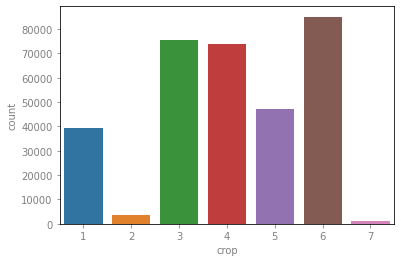

6    85074
3    75673
4    74067
5    47117
1    39162
2     3598
7     1143
Name: crop, dtype: int64


In [10]:
sns.countplot(x='crop', data=data)
plt.show()
print(data.crop.value_counts())

There is a significant amount of class imbalance in the dataset. This will be handled later using a synthetic growth technique.
Continue with exploration of the features to determine potential 

In [11]:
corrs = data.corr()    

In [12]:
data

,crop,sigHH_Rad05July,sigHV_Rad05July,sigVV_Rad05July,sigRR_Rad05July,sigRL_Rad05July,sigLL_Rad05July,Rhhvv_Rad05July,Rhvhh_Rad05July,Rhvvv_Rad05July,...,SecMomPC1_Opt14July,CorPC1_Opt14July,MeanPC2_Opt14July,VarPC2_Opt14July,HomPC2_Opt14July,ConPC2_Opt14July,DisPC2_Opt14July,EntPC2_Opt14July,SecMomPC2_Opt14July,CorPC2_Opt14July
0,1,-13.55900,-21.4070,-11.40400,-15.24800,-11.92300,-15.29100,-2.15480,-7.8474,-10.0020,...,0.18519,0.726020,5.3333,6.000000,0.29489,9.77780,2.44440,1.67700,0.20988,0.65422
1,1,-12.80200,-20.3350,-10.39900,-14.13200,-11.09600,-14.36100,-2.40390,-7.5330,-9.9369,...,0.33333,-0.487510,2.1111,0.098765,0.83333,0.33333,0.33333,0.84869,0.50617,-0.18898
2,1,-12.43100,-19.9020,-10.07400,-13.59800,-10.82900,-14.04800,-2.35660,-7.4717,-9.8283,...,0.25926,0.252980,2.2222,0.172840,0.68889,0.88889,0.66667,1.27300,0.30864,0.10483
3,1,-12.68900,-19.5290,-10.02800,-13.35000,-11.05600,-14.01400,-2.66110,-6.8396,-9.5006,...,0.16049,0.437500,4.1111,0.320990,0.83333,0.33333,0.33333,1.14910,0.38272,0.41603
4,1,-12.68600,-19.2780,-9.81850,-13.10800,-10.93200,-13.93900,-2.86750,-6.5919,-9.4594,...,0.18519,0.350000,4.0000,0.444440,0.68889,0.88889,0.66667,1.58110,0.20988,0.50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325829,7,2.48230,-7.6870,1.07950,0.74318,-0.94070,0.90493,1.40280,-10.1690,-8.7665,...,0.13580,0.760800,2.3333,0.222220,0.88889,0.22222,0.22222,1.06090,0.35802,0.63246
325830,7,2.52340,-7.6745,1.08680,0.76189,-0.91177,0.93663,1.43660,-10.1980,-8.7614,...,0.13580,-0.383990,6.0000,10.444000,0.12684,19.55600,4.00000,2.19720,0.11111,0.81224
325831,7,-1.92700,-11.4160,-2.43540,-3.45370,-4.15130,-3.48100,0.50845,-9.4886,-8.9802,...,0.13580,0.754830,2.3333,0.222220,0.83333,0.33333,0.33333,1.27300,0.30864,0.31623
325832,7,0.12483,-10.1440,-0.62193,-1.54210,-2.31000,-1.52500,0.74676,-10.2690,-9.5218,...,0.33333,0.059761,3.0000,0.000000,0.94444,0.11111,0.11111,0.34883,0.80247,0.18898


In [13]:
top_positive_cor = corrs.sort_values(ascending=False, by='crop').iloc[:18,:1]
top_negative_cor = corrs.sort_values(ascending=False, by='crop').iloc[-17:,:1]
target_variable = corrs.sort_values(ascending=False, by='crop').iloc[:1,:1]
top_negative_cor = target_variable.append(top_negative_cor)

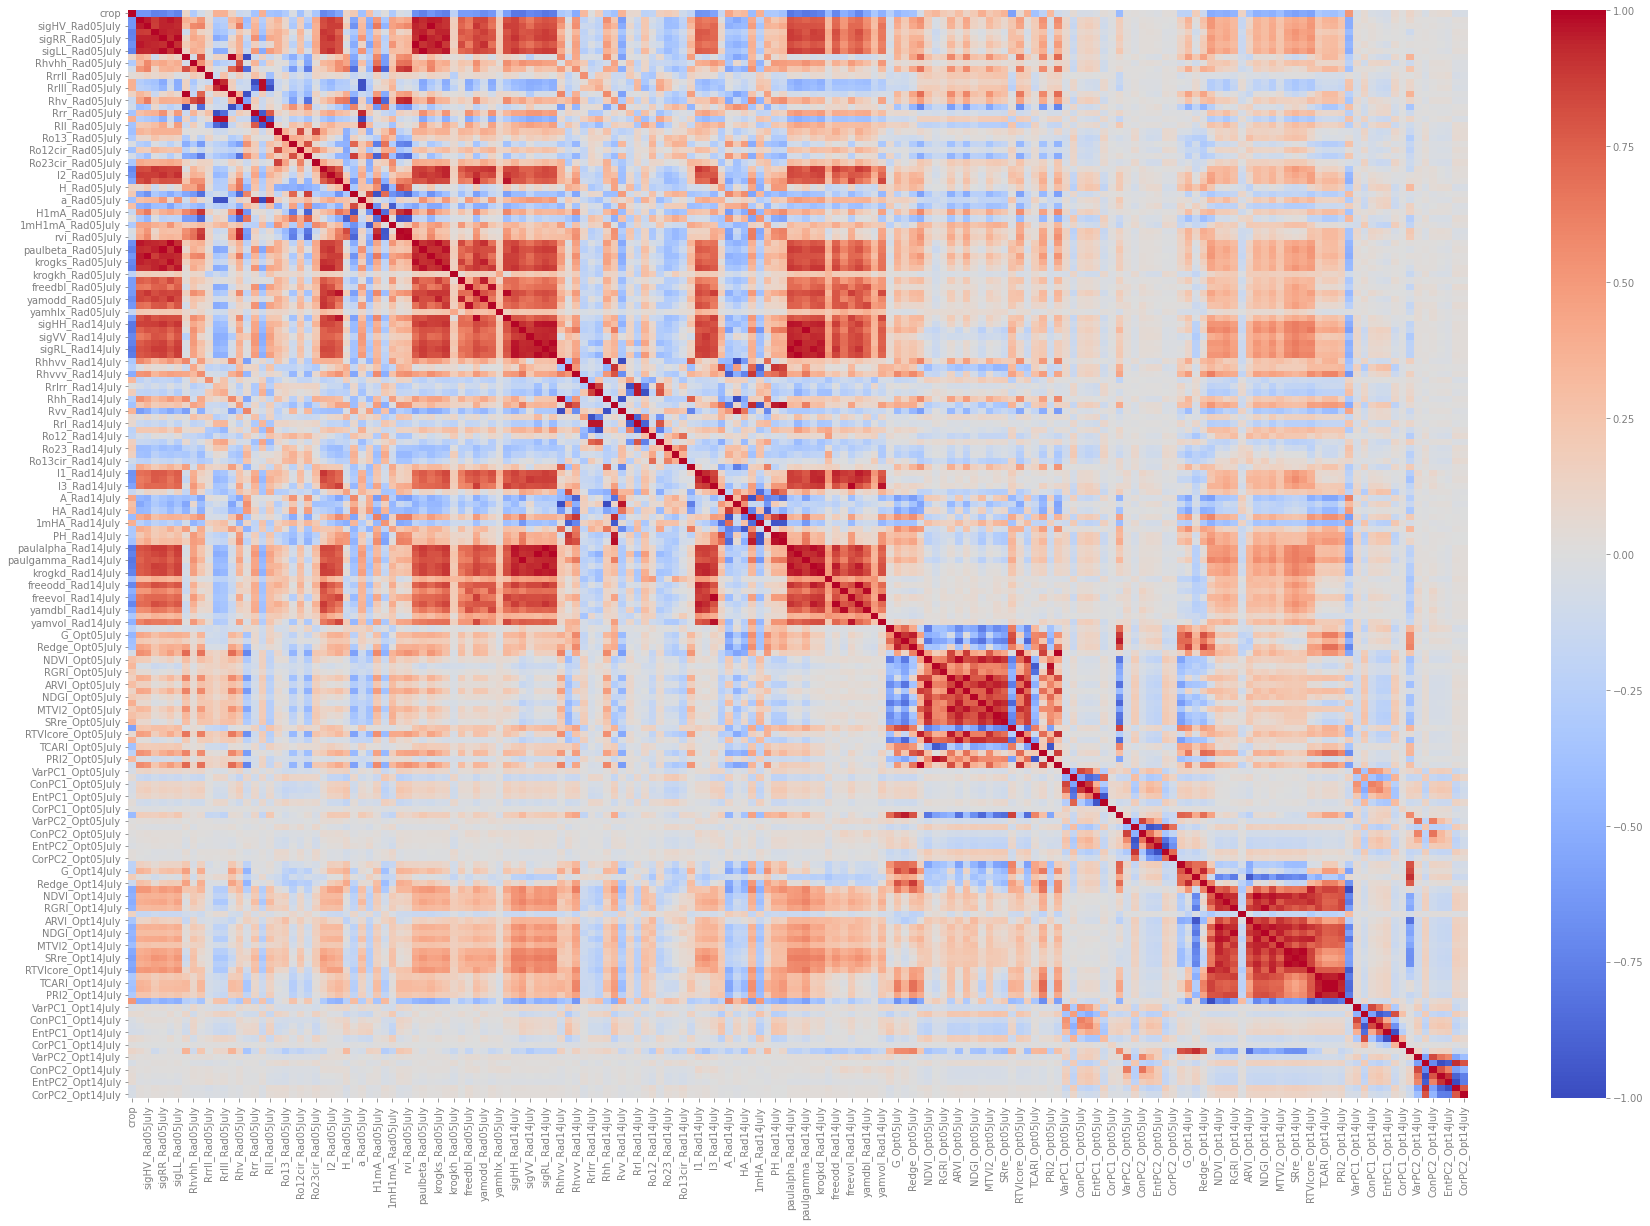

In [14]:
plt.figure(figsize=(30,20))
sns.heatmap(corrs, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

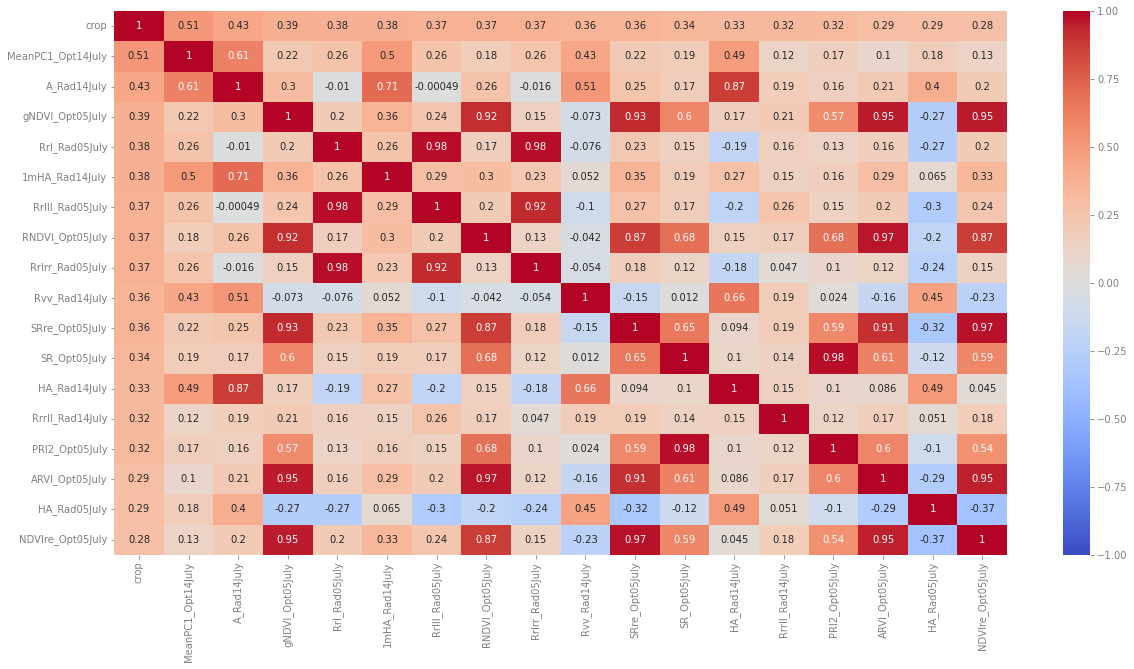

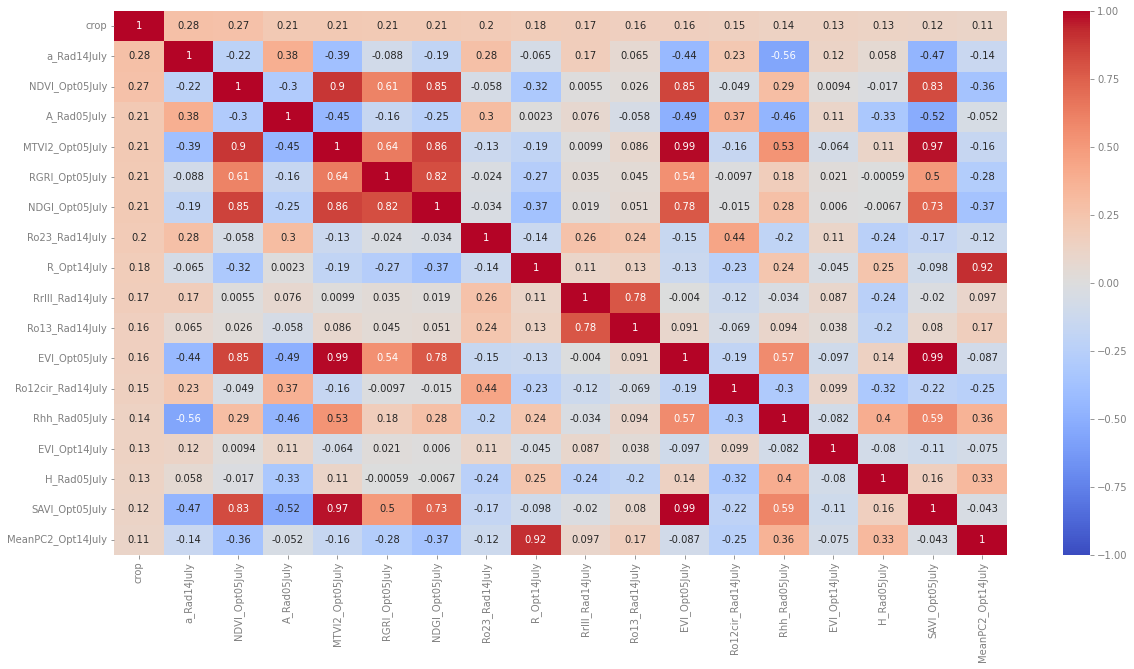

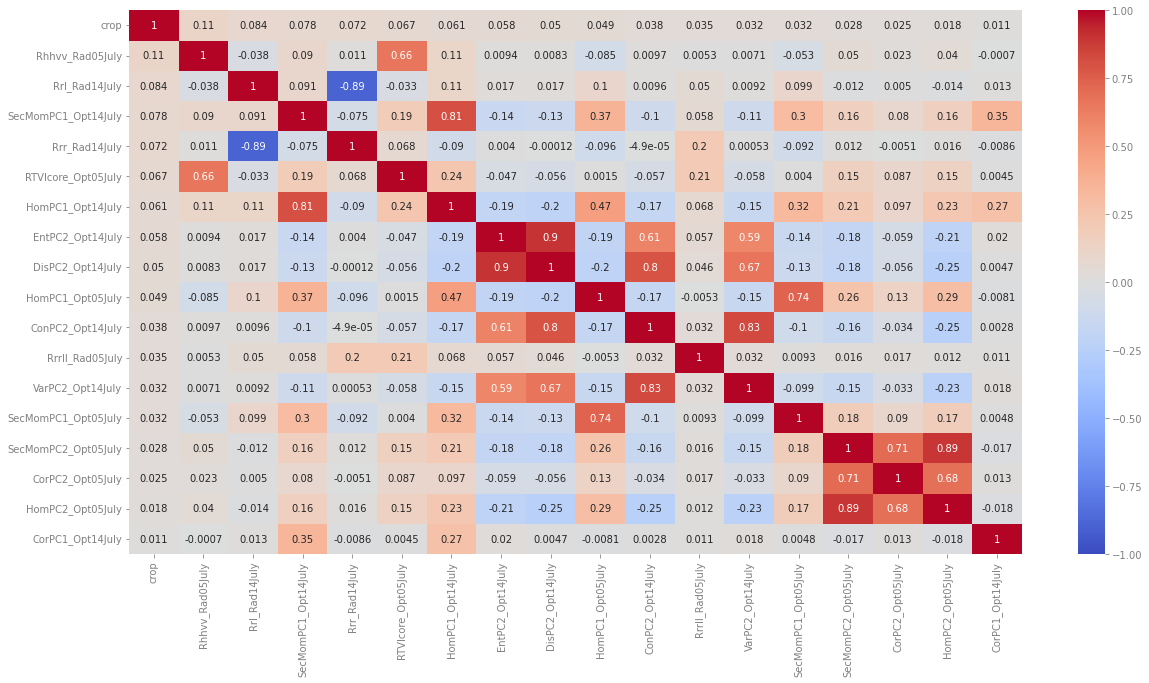

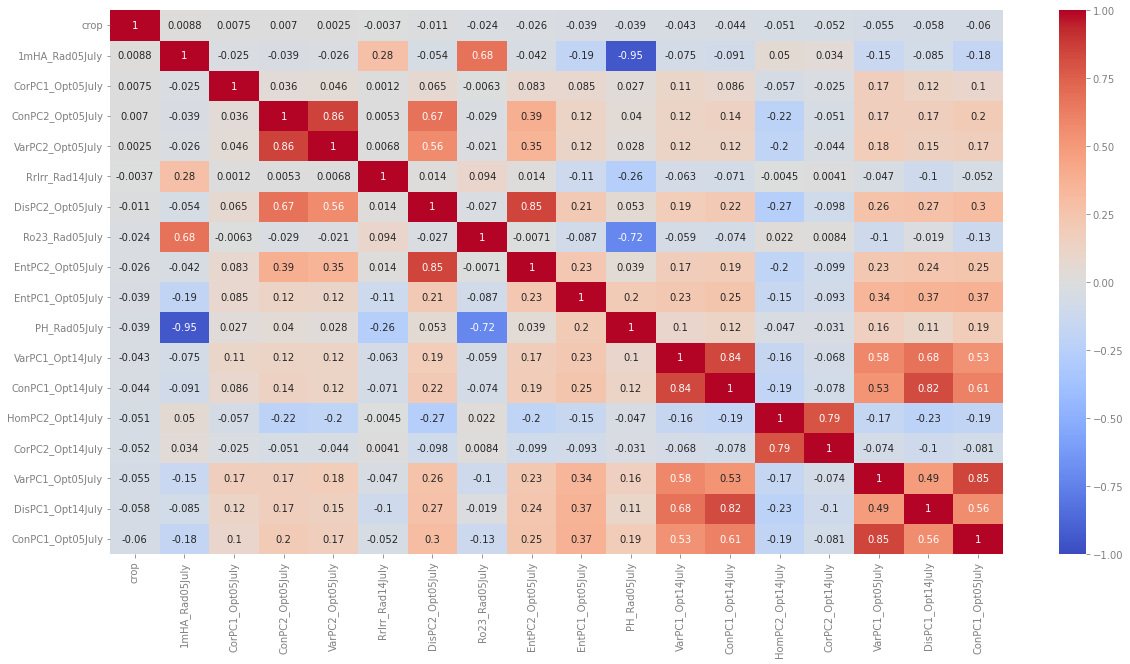

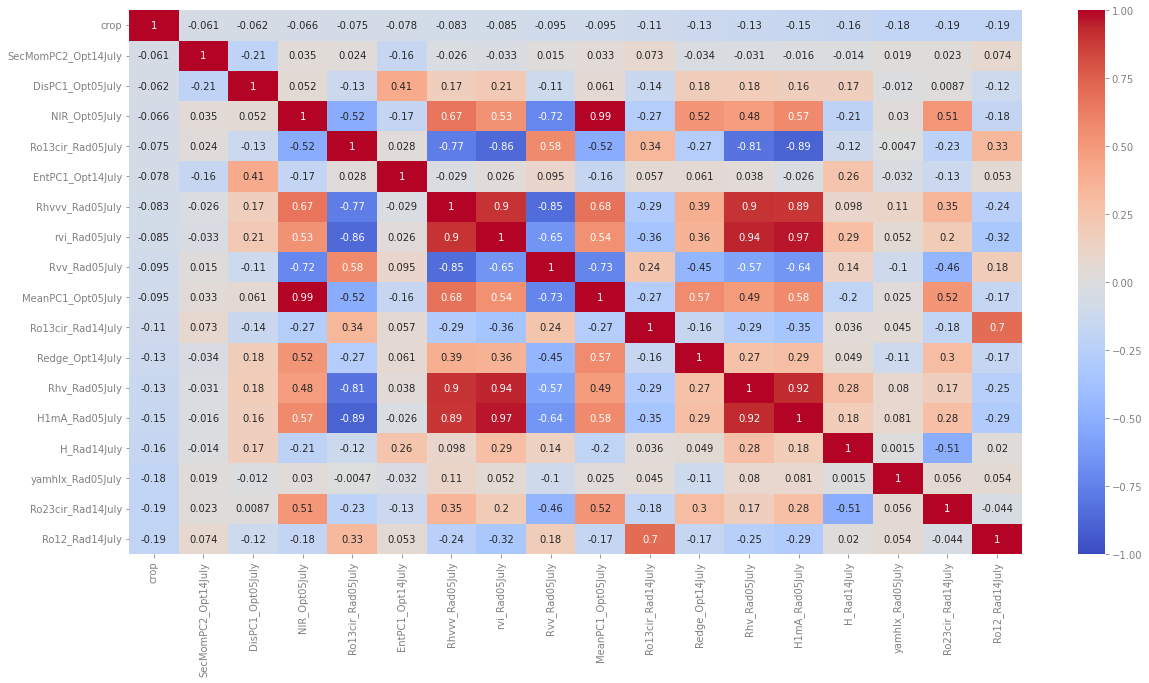

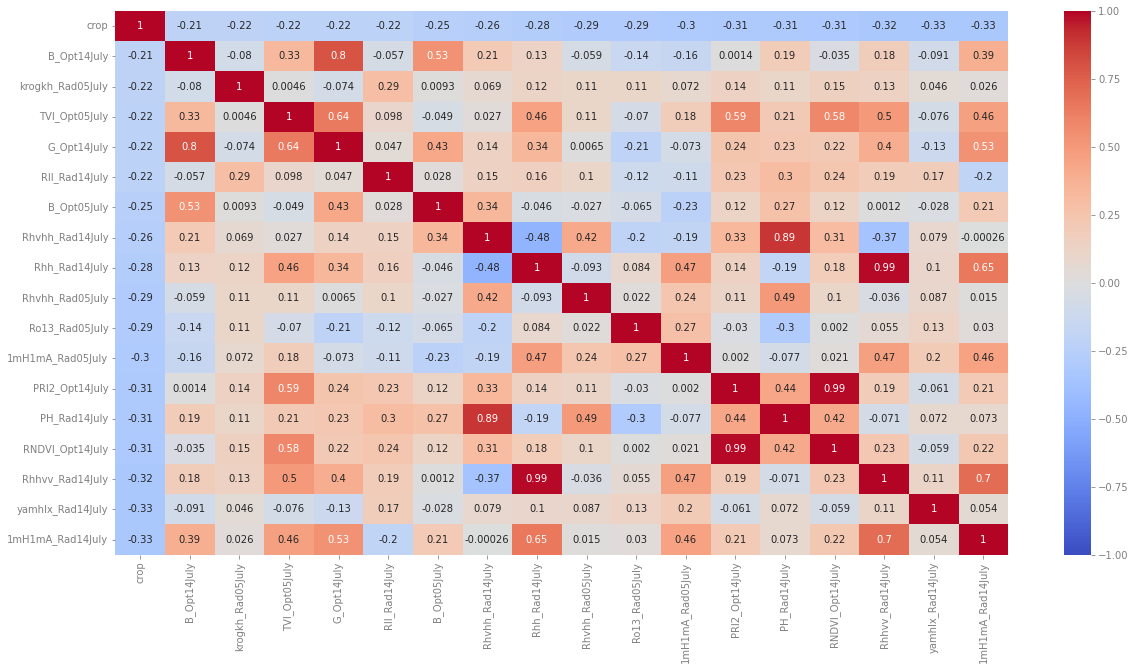

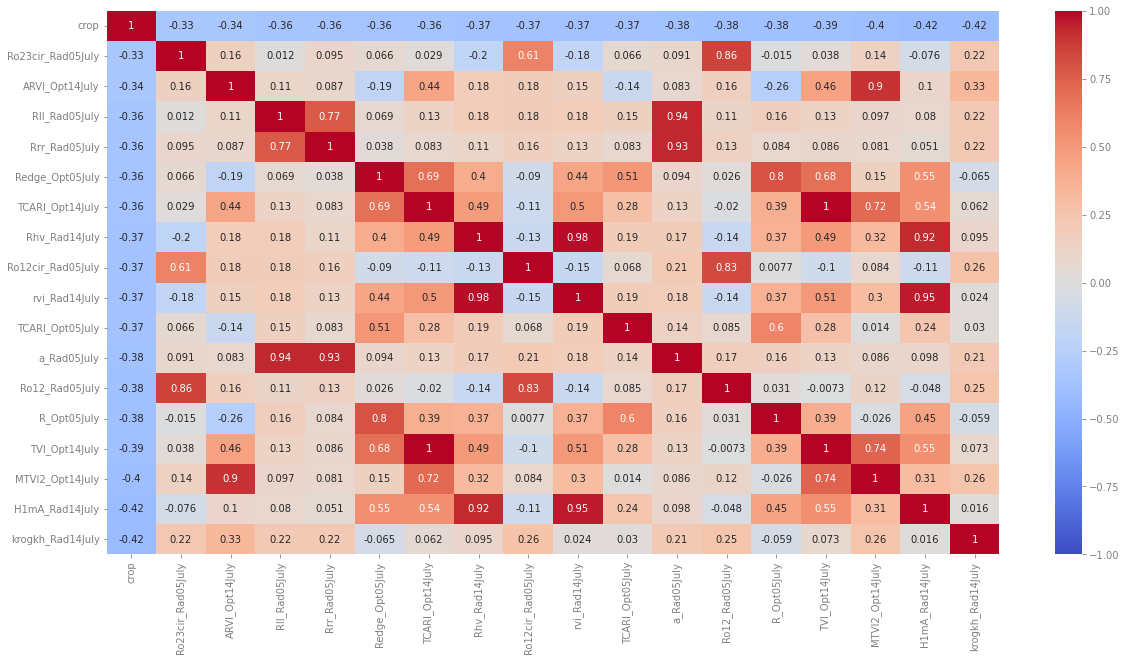

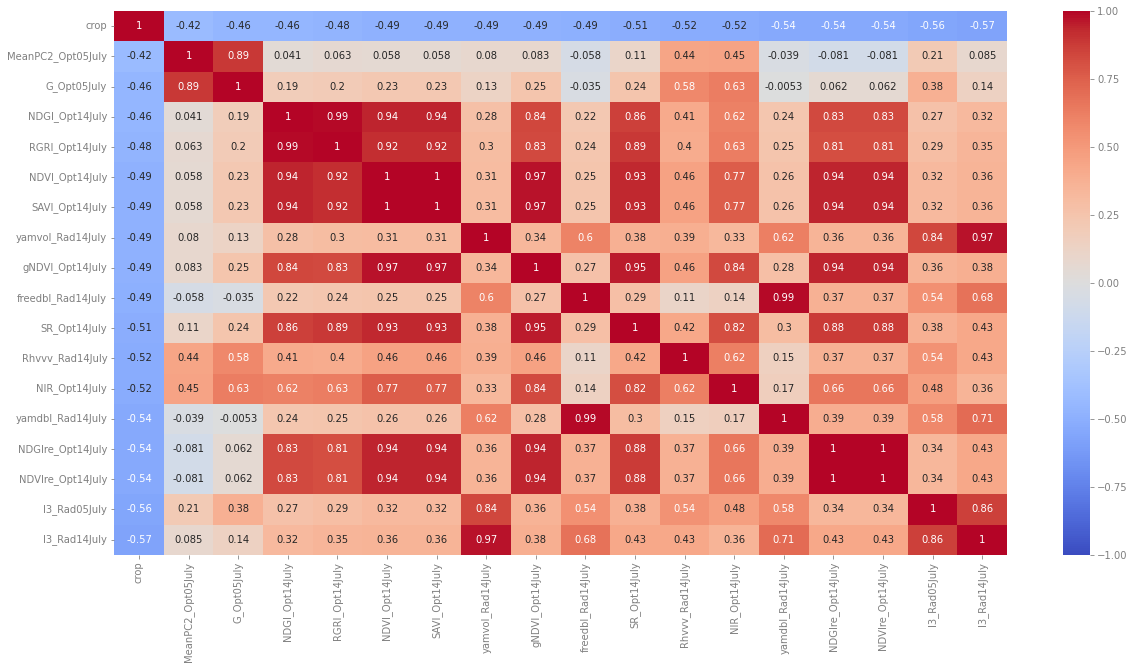

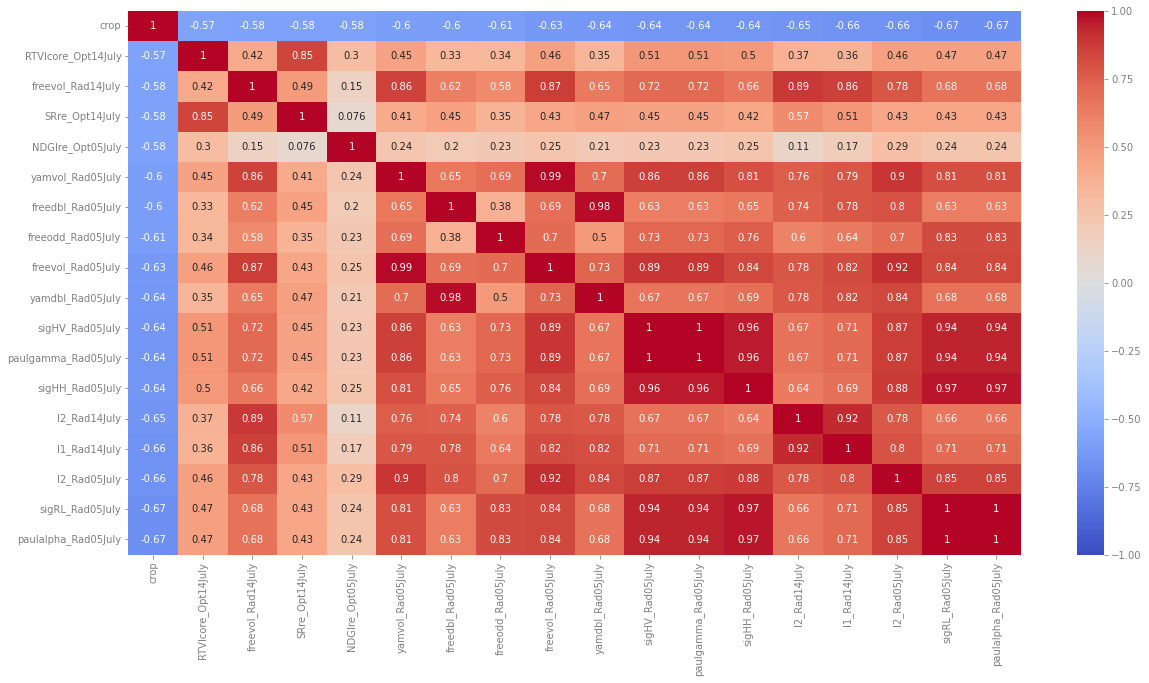

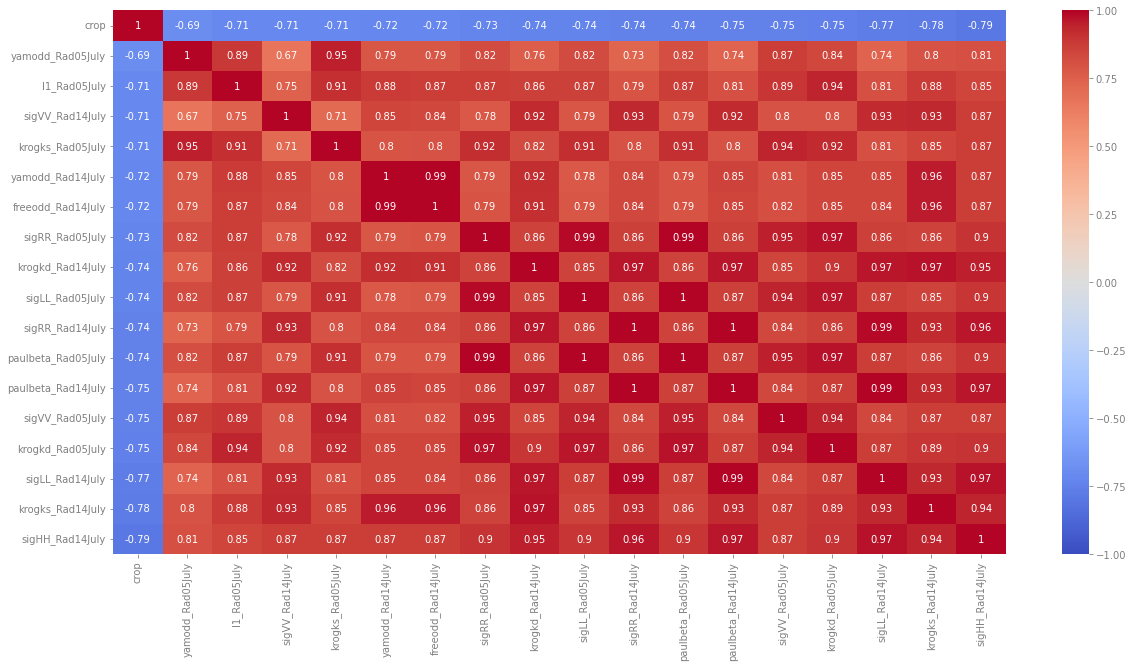

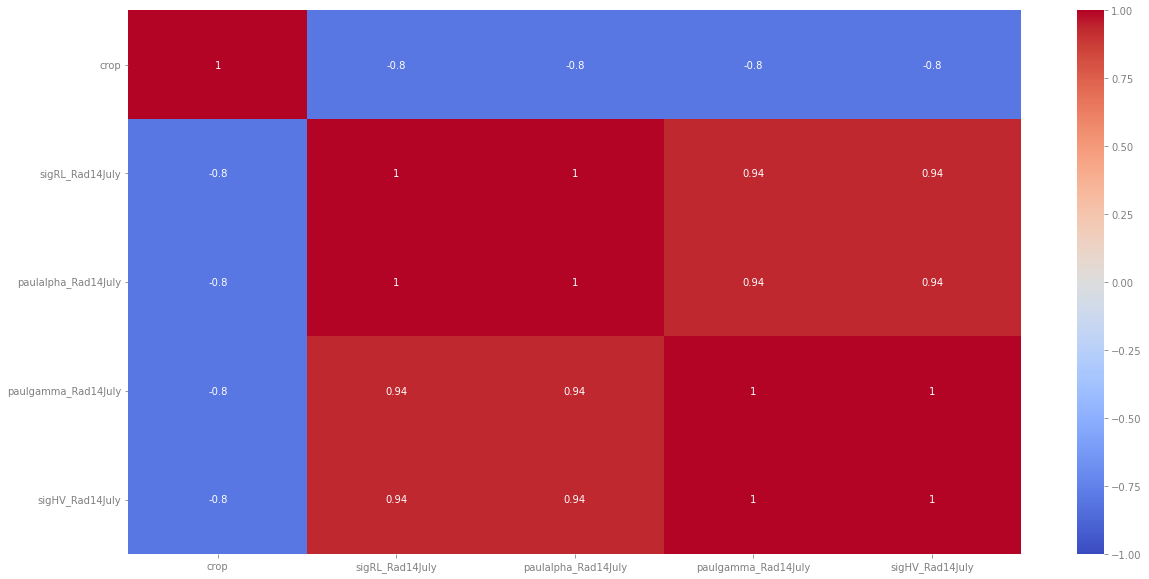

In [15]:
for i in range(1,12):
    if i == 1:
        start = i
        stop = i + 17
        var_range = corrs.sort_values(ascending=False, by='crop').iloc[start:stop,:1]
        map_vars = target_variable.append(var_range)
        heatmap = corrs.sort_values(ascending=False, by='crop').loc[map_vars.index, map_vars.index]
        plt.figure(figsize=(20,10))
        sns.heatmap(heatmap, cmap='coolwarm', vmin=-1, vmax=1, annot=True)
        plt.show()
    elif i > 1  and i < 11:
        start = stop
        stop = start + 17
        var_range = corrs.sort_values(ascending=False, by='crop').iloc[start:stop,:1]
        map_vars = target_variable.append(var_range)
        heatmap = corrs.sort_values(ascending=False, by='crop').loc[map_vars.index, map_vars.index]
        plt.figure(figsize=(20,10))
        sns.heatmap(heatmap, cmap='coolwarm', vmin=-1, vmax=1, annot=True)
        plt.show()
    else:
        var_range = corrs.sort_values(ascending=False, by='crop').iloc[171:175,:1]
        map_vars = target_variable.append(var_range)
        heatmap = corrs.sort_values(ascending=False, by='crop').loc[map_vars.index, map_vars.index]
        plt.figure(figsize=(20,10))
        sns.heatmap(heatmap, cmap='coolwarm', vmin=-1, vmax=1, annot=True)
        plt.show()

In [16]:
positive_heatmap = corrs.sort_values(ascending=False, by='crop').loc[top_positive_cor.index, top_positive_cor.index]
negative_heatmap = corrs.sort_values(ascending=False, by='crop').loc[top_negative_cor.index, top_negative_cor.index]

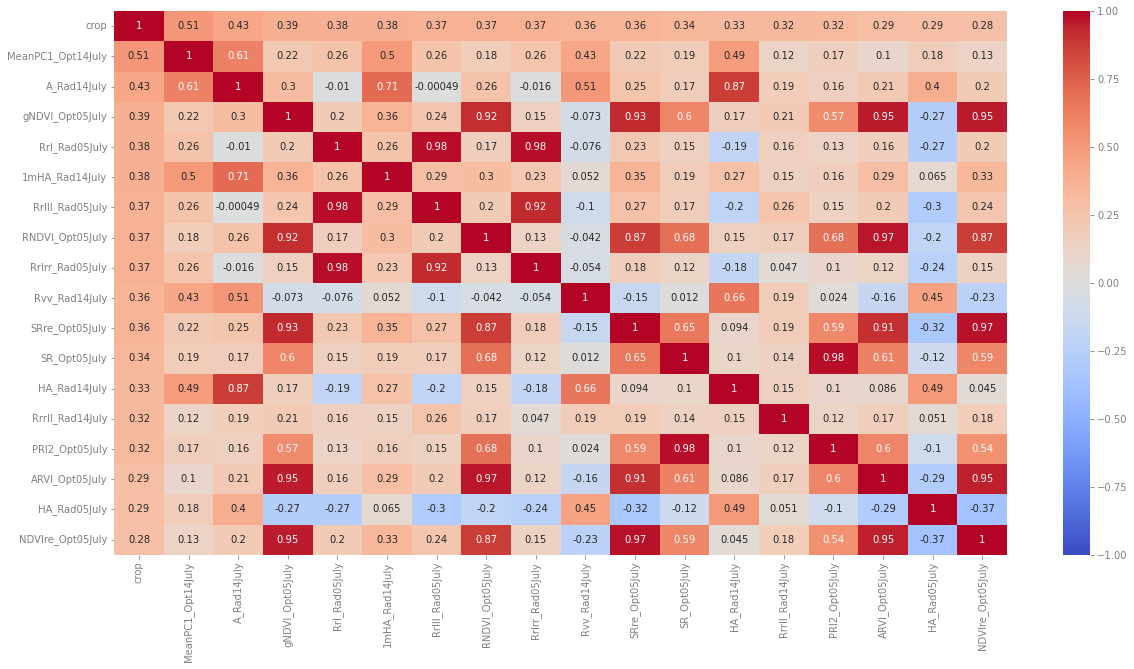

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(positive_heatmap, cmap='coolwarm', vmin=-1, vmax=1, annot=True)
plt.show()

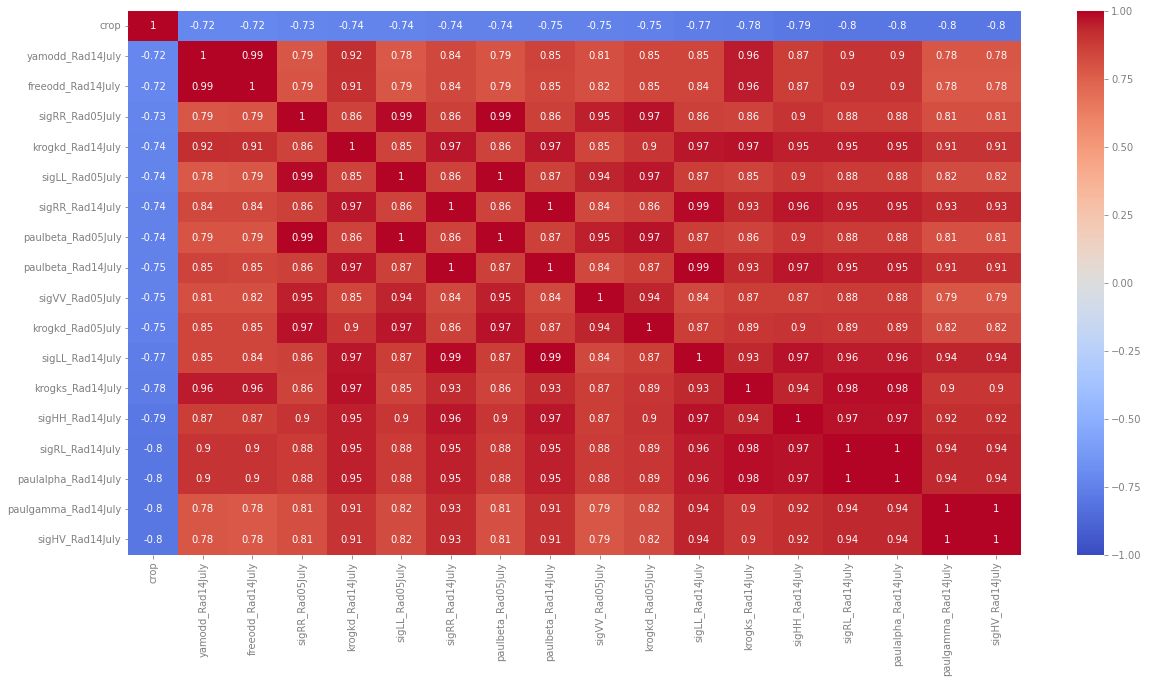

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(negative_heatmap, cmap='coolwarm', vmin=-1, vmax=1, annot=True)
plt.show()

In [19]:
feature_corrs = corrs.drop('crop')
feature_corrs = feature_corrs.drop('crop', axis=1)
feature_corrs

,sigHH_Rad05July,sigHV_Rad05July,sigVV_Rad05July,sigRR_Rad05July,sigRL_Rad05July,sigLL_Rad05July,Rhhvv_Rad05July,Rhvhh_Rad05July,Rhvvv_Rad05July,Rrrll_Rad05July,...,SecMomPC1_Opt14July,CorPC1_Opt14July,MeanPC2_Opt14July,VarPC2_Opt14July,HomPC2_Opt14July,ConPC2_Opt14July,DisPC2_Opt14July,EntPC2_Opt14July,SecMomPC2_Opt14July,CorPC2_Opt14July
sigHH_Rad05July,1.000000,0.959623,0.878904,0.940764,0.966871,0.937077,0.375803,0.320806,0.508517,0.079352,...,0.054896,-0.004104,0.071595,0.013009,0.014608,0.011096,-0.009695,-0.022247,0.024887,0.018481
sigHV_Rad05July,0.959623,1.000000,0.871976,0.939766,0.937634,0.927391,0.305146,0.574273,0.601561,0.132853,...,0.023044,-0.002665,0.029091,0.019852,0.003454,0.019581,0.001523,-0.010552,0.013447,0.010665
sigVV_Rad05July,0.878904,0.871976,1.000000,0.946727,0.931361,0.942607,-0.111740,0.378121,0.133482,0.082382,...,0.012776,-0.004042,-0.109513,0.010286,0.019636,0.006901,-0.014669,-0.028708,0.032470,0.024714
sigRR_Rad05July,0.940764,0.939766,0.946727,1.000000,0.916543,0.987017,0.120631,0.426346,0.357647,0.140224,...,0.006503,-0.004884,-0.025919,0.013847,0.016382,0.010440,-0.011286,-0.024264,0.027487,0.021900
sigRL_Rad05July,0.966871,0.937634,0.931361,0.916543,1.000000,0.909067,0.204873,0.343180,0.378402,0.101247,...,0.060067,-0.002802,0.019799,0.015284,0.009333,0.013582,-0.004663,-0.016849,0.019921,0.014216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ConPC2_Opt14July,0.011096,0.019581,0.006901,0.010440,0.013582,0.005405,0.009710,0.033638,0.028380,0.031668,...,-0.104441,0.002797,0.116604,0.830983,-0.705689,1.000000,0.796274,0.609302,-0.591693,-0.463072
DisPC2_Opt14July,-0.009695,0.001523,-0.014669,-0.011286,-0.004663,-0.018917,0.008301,0.033345,0.027020,0.046361,...,-0.131330,0.004663,0.135202,0.665511,-0.989439,0.796274,1.000000,0.898733,-0.897437,-0.759399
EntPC2_Opt14July,-0.022247,-0.010552,-0.028708,-0.024264,-0.016849,-0.033668,0.009426,0.029219,0.025484,0.056512,...,-0.141158,0.019925,0.133637,0.588458,-0.917688,0.609302,0.898733,1.000000,-0.993672,-0.766471
SecMomPC2_Opt14July,0.024887,0.013447,0.032470,0.027487,0.019921,0.036999,-0.011235,-0.027152,-0.025761,-0.056978,...,0.138993,-0.019280,-0.132471,-0.563006,0.921530,-0.591693,-0.897437,-0.993672,1.000000,0.776471


In [20]:
feature_corrs['sigHH_Rad05July']

sigHH_Rad05July        1.000000
sigHV_Rad05July        0.959623
sigVV_Rad05July        0.878904
sigRR_Rad05July        0.940764
sigRL_Rad05July        0.966871
                         ...   
ConPC2_Opt14July       0.011096
DisPC2_Opt14July      -0.009695
EntPC2_Opt14July      -0.022247
SecMomPC2_Opt14July    0.024887
CorPC2_Opt14July       0.018481
Name: sigHH_Rad05July, Length: 174, dtype: float64

In [21]:
high_corr_features = {}
unique_features = []
feature_columns = list(feature_corrs.columns)
for i in feature_columns:
    true_vals = ((abs(feature_corrs[i]) >= .9) & (feature_corrs[i] < 1))
    if len(feature_corrs[true_vals].index.values) > 0:
        high_corr_features[i] = list(feature_corrs[true_vals].index.values)
    else:
        unique_features.append(i)
       

In [22]:
print('Highly correlated features: ' + str(len(high_corr_features.keys())), 'Features lacking high correlations: ' + str(len(unique_features)), sep="\n")

Highly correlated features: 134
Features lacking high correlations: 40


77 percent of the features in this dataset have a correlation with an absolute value of greater than or equal to .9. Only 40 features are outside of the correlation range mentioned above. This suggests that a reduction in the dimensionality of the data may be necessary in order to design a model that can accurately predict the field crop.

In [23]:
df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in high_corr_features.items() ]))

In [24]:
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [59]:
data['crop'] = data['crop'].map(crop_names)

In [61]:
y = data['crop']
X = data.drop('crop', axis=1)

In [26]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [253]:
def cross_tab(X_var, y_var, k,norm=False):
    cluster_pipe = make_pipeline(scaler,KMeans(n_clusters=k))
    cluster_pipe.fit(X_var)
    labels = cluster_pipe.predict(X_var)
    kmeans_df = pd.DataFrame({'Predictions':labels, 'Actual':y_var})
    pd.options.display.float_format = '{:.2f}'.format
    print(str(scaler), pd.crosstab(kmeans_df.Predictions, kmeans_df.Actual, normalize=norm), sep='\n')

In [111]:
scalers_list = [StandardScaler(), MinMaxScaler(), RobustScaler()]
for scaler in scalers_list:
    cross_tab(X, y, 7, norm='index')

StandardScaler()
Actual       Broadleaf  Canola  Corn  Oats  Peas  Soybeans  Wheat
Predictions                                                      
0                 0.00    0.01  0.02  0.01  0.00      0.95   0.01
1                 0.00    0.00  0.00  0.39  0.00      0.00   0.60
2                 0.02    0.75  0.01  0.04  0.09      0.04   0.04
3                 0.00    0.00  0.00  0.02  0.00      0.00   0.98
4                 0.00    0.99  0.00  0.00  0.00      0.00   0.00
5                 0.00    0.01  0.01  0.01  0.00      0.97   0.00
6                 0.01    0.00  0.97  0.00  0.00      0.01   0.01
MinMaxScaler()
Actual       Broadleaf  Canola  Corn  Oats  Peas  Soybeans  Wheat
Predictions                                                      
0                 0.00    0.00  0.00  0.01  0.00      0.00   0.98
1                 0.00    0.01  0.00  0.41  0.00      0.00   0.58
2                 0.00    0.91  0.00  0.02  0.04      0.01   0.01
3                 0.00    0.01  0.01  0.01  

The KMeans algorithim struggles to split the images into the correct clusters regardless of scaling technique. Standardscaler, MinMaxscaler, and Robustscaler all appear to perform relatively similarly. The clustering algorithm stuggles to cluster all of the soybean and wheat observations together. Observations for these crops appear to be split relatively evenly between 2 different clusters. This might suggest that the algorithm has trouble distinguishing between relatively similar crop species. Wheat and oats for example both look very similar (https://www.youtube.com/watch?v=8p6Kd-c2nBQ) and as such both appear in the same unsupervised clusters at high levels. However, this does not explain why fields of soybeans would also be split among 2 different clusters in the non outlier resistant scalers and appear in single cluster using a robust scaler. These issues could be due to the presence of 2 different observation dates

Create date filters.

In [64]:
july_5 = ['crop']
july_14 = ['crop']
for i in re.findall(r"\w+05July\b", str(list(data.columns))):
    july_5.append(i) 
for i in re.findall(r"\w+14July\b", str(list(data.columns))):
    july_14.append(i)

In [65]:
data[july_5].shape == data[july_14].shape

True

In [66]:
july_5_data = data[july_5]
july_14_data = data[july_14]

In [67]:
y05 = july_5_data['crop']
X05 = july_5_data.drop('crop', axis=1)
y14 = july_14_data['crop']
X14 = july_14_data.drop('crop', axis=1)
days_x = [X05, X14]
days_y = [y05, y14]

In [102]:
scalers_list = [StandardScaler(), MinMaxScaler(), RobustScaler()]
for day_x,day_y in zip(days_x, days_y):
    for scaler in scalers_list:
        print(day_x.columns[0])
        cross_tab(day_x, day_y, 7, norm='index')


sigHH_Rad05July
StandardScaler()
Actual       Broadleaf  Canola  Corn  Oats  Peas  Soybeans  Wheat
Predictions                                                      
0                 0.01    0.42  0.09  0.11  0.02      0.19   0.15
1                 0.00    0.01  0.01  0.00  0.00      0.84   0.14
2                 0.00    0.01  0.97  0.01  0.00      0.01   0.01
3                 0.00    0.00  0.00  0.60  0.00      0.00   0.40
4                 0.03    0.79  0.01  0.02  0.11      0.02   0.02
5                 0.00    0.99  0.00  0.00  0.00      0.00   0.00
6                 0.00    0.00  0.01  0.20  0.00      0.06   0.73
sigHH_Rad05July
MinMaxScaler()
Actual       Broadleaf  Canola  Corn  Oats  Peas  Soybeans  Wheat
Predictions                                                      
0                 0.00    0.87  0.04  0.01  0.05      0.01   0.02
1                 0.00    0.01  0.00  0.00  0.00      0.91   0.08
2                 0.00    0.01  0.01  0.34  0.00      0.04   0.60
3           

Splitting the data by date of observation does not appear to have a significant impact on the issues stated above. However, in both cases the Robustscaler does prevent the splitting of soybean observations into 2 different clusters. It does not increase the models ability to distinguish between oats and wheat. The dataset does have significant imbalanced between classes, some classes have hundreds of thousands of observations while others barely have 1000 observations. As such very little of the information from these crop types is impacting the cluster make ups. Perhaps balancing the data with a synthetic growth techniques will allow for better clustering of the dataset.

Prior to any synthetic growth techniques test data must be split from the model to avoid information leaking into the training set.

In [69]:
X_smote, y_smote = SMOTE(random_state=19).fit_resample(X,y)

In [103]:
scalers_list = [StandardScaler(), MinMaxScaler()]
for scaler in scalers_list:
    cross_tab(X_smote, y_smote, 7, norm='index')

StandardScaler()
Actual       Broadleaf  Canola  Corn  Oats  Peas  Soybeans  Wheat
Predictions                                                      
0                 0.00    0.00  0.00  0.00  0.99      0.00   0.00
1                 0.00    0.00  0.00  0.54  0.00      0.00   0.46
2                 0.00    0.01  0.02  0.01  0.00      0.81   0.15
3                 0.00    0.97  0.00  0.01  0.00      0.02   0.00
4                 0.00    0.00  0.96  0.00  0.00      0.03   0.00
5                 1.00    0.00  0.00  0.00  0.00      0.00   0.00
6                 0.93    0.00  0.00  0.01  0.05      0.00   0.01
MinMaxScaler()
Actual       Broadleaf  Canola  Corn  Oats  Peas  Soybeans  Wheat
Predictions                                                      
0                 0.00    0.91  0.01  0.02  0.00      0.05   0.01
1                 0.91    0.00  0.01  0.01  0.06      0.00   0.01
2                 0.00    0.01  0.02  0.02  0.00      0.80   0.15
3                 0.00    0.00  0.00  0.54  

In [71]:
X_bsm, y_bsm = BorderlineSMOTE(random_state=19).fit_resample(X,y)

In [104]:
scalers_list = [StandardScaler(), MinMaxScaler()]
for scaler in scalers_list:
    cross_tab(X_bsm, y_bsm, 7, norm='index')

StandardScaler()
Actual       Broadleaf  Canola  Corn  Oats  Peas  Soybeans  Wheat
Predictions                                                      
0                 0.00    0.01  0.01  0.01  0.97      0.00   0.01
1                 0.00    0.00  0.00  0.54  0.00      0.00   0.45
2                 0.00    0.01  0.02  0.01  0.00      0.81   0.15
3                 0.99    0.00  0.00  0.00  0.00      0.00   0.00
4                 1.00    0.00  0.00  0.00  0.00      0.00   0.00
5                 0.00    0.93  0.01  0.01  0.00      0.04   0.00
6                 0.01    0.00  0.98  0.00  0.00      0.01   0.00
MinMaxScaler()
Actual       Broadleaf  Canola  Corn  Oats  Peas  Soybeans  Wheat
Predictions                                                      
0                 0.00    0.01  0.01  0.01  0.97      0.00   0.01
1                 0.00    0.00  0.98  0.00  0.00      0.01   0.01
2                 0.97    0.00  0.00  0.01  0.01      0.00   0.01
3                 0.97    0.00  0.00  0.00  

In [106]:
X_ada, y_ada = ADASYN(random_state=19, sampling_strategy='minority').fit_resample(X,y)

In [112]:
scalers_list = [StandardScaler(), MinMaxScaler()]
for scaler in scalers_list:
    cross_tab(X_ada, y_ada, 7, norm='index')

StandardScaler()
Actual       Broadleaf  Canola  Corn  Oats  Peas  Soybeans  Wheat
Predictions                                                      
0                 0.01    0.00  0.96  0.00  0.00      0.01   0.01
1                 0.00    0.97  0.00  0.01  0.00      0.01   0.00
2                 0.93    0.00  0.00  0.01  0.04      0.00   0.01
3                 0.00    0.00  0.00  0.39  0.00      0.00   0.60
4                 0.00    0.01  0.01  0.01  0.00      0.97   0.00
5                 1.00    0.00  0.00  0.00  0.00      0.00   0.00
6                 0.00    0.01  0.02  0.02  0.00      0.19   0.76
MinMaxScaler()
Actual       Broadleaf  Canola  Corn  Oats  Peas  Soybeans  Wheat
Predictions                                                      
0                 0.00    0.94  0.00  0.02  0.00      0.03   0.01
1                 0.93    0.00  0.00  0.01  0.04      0.00   0.01
2                 0.01    0.00  0.97  0.00  0.00      0.01   0.01
3                 0.00    0.01  0.01  0.01  

In [113]:
scalers_list = [StandardScaler(), MinMaxScaler()]
for scaler in scalers_list:
    cross_tab(X_ada, y_ada)

StandardScaler()
Actual       Broadleaf  Canola   Corn   Oats  Peas  Soybeans  Wheat
Predictions                                                        
0                 8878       0      2      0     0         2      1
1                75278     207    319    628  3444       178    591
2                    0      85     89  44749     0       245  68420
3                    0     486    725    508     9     68495    270
4                  554      28  37412    125     1       531    323
5                   27   74755    265    609   142       819    215
6                    4     112    350    498     2      3797  15254
MinMaxScaler()
Actual       Broadleaf  Canola   Corn   Oats  Peas  Soybeans  Wheat
Predictions                                                        
0                    0     168     69  43946     0       164  67248
1                75408     294    355    604  3278       228    709
2                    0   74388    347   1218   303      2391    859
3               

Adasyn performs the worst out of all the oversampling techniques, as it is unable to mulitclass problems. SMOTE and BorderlineSMOTE perform very similarly. SMOTE is less computationally expensive and since it performs similarly to blSMOTE will be used to balance the data prior to training a model. Standard scaler performs slightly better in unsupervised classification and will be used to scale the data in model training. All the previously explored balancing techniques do not assist in the classification of Oats and Wheat, and all of them lead to improper grouping in the most sparcly sampled original crop Broadleaf. To assist the model in classifing these groups better, wheat and oats will be combined into a single group for the first pass of the ML classification model and the Broadleaf group will be dropped completely.

In [114]:
broadleaf_filter = data.crop == 'Broadleaf'

In [154]:
reduced_crop = data[~broadleaf_filter]
bll_crop = data[~broadleaf_filter]

In [155]:
wheat_oat = (reduced_crop.crop == 'Wheat') | (reduced_crop.crop == 'Oats')

In [156]:
reduced_crop['crop'] = reduced_crop['crop'].apply(lambda x: 'Wheat_Oats' if (x == 'Wheat') | (x == 'Oats') else x)

/var/folders/mw/twnx7f095wngt0_jb2pglg_m0000gn/T/ipykernel_2219/1477617042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_crop['crop'] = reduced_crop['crop'].apply(lambda x: 'Wheat_Oats' if (x == 'Wheat') | (x == 'Oats') else x)


In [277]:
y = reduced_crop['crop']
X = reduced_crop.drop('crop', axis=1)

In [265]:
X_smote, y_smote = SMOTE(random_state=19).fit_resample(X,y)

In [266]:
scalers_list = [StandardScaler()]
for scaler in scalers_list:
    for i in ['index', False]:
        cross_tab(X_smote, y_smote, len(y_smote.unique()), norm=i)

StandardScaler()
Actual       Canola  Corn  Peas  Soybeans  Wheat_Oats
Predictions                                          
0              0.00  0.00  0.98      0.00        0.01
1              0.97  0.01  0.00      0.01        0.01
2              0.00  0.99  0.00      0.01        0.00
3              0.00  0.00  0.00      0.00        0.99
4              0.01  0.03  0.00      0.94        0.03
StandardScaler()
Actual       Canola    Corn    Peas  Soybeans  Wheat_Oats
Predictions                                              
0            130722     781     372      1218        1030
1                53  126784     322       681         475
2               573     446  131188       229        1153
3                98     443       0       363      125556
4               745    3737     309    129700        3977


The data has both a high amount of observations and a large amount of features. PCA and Feature selection can be done to reduce the extreme dimensionality present in the data.

In [74]:
from sklearn.decomposition import PCA

In [267]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_smote)

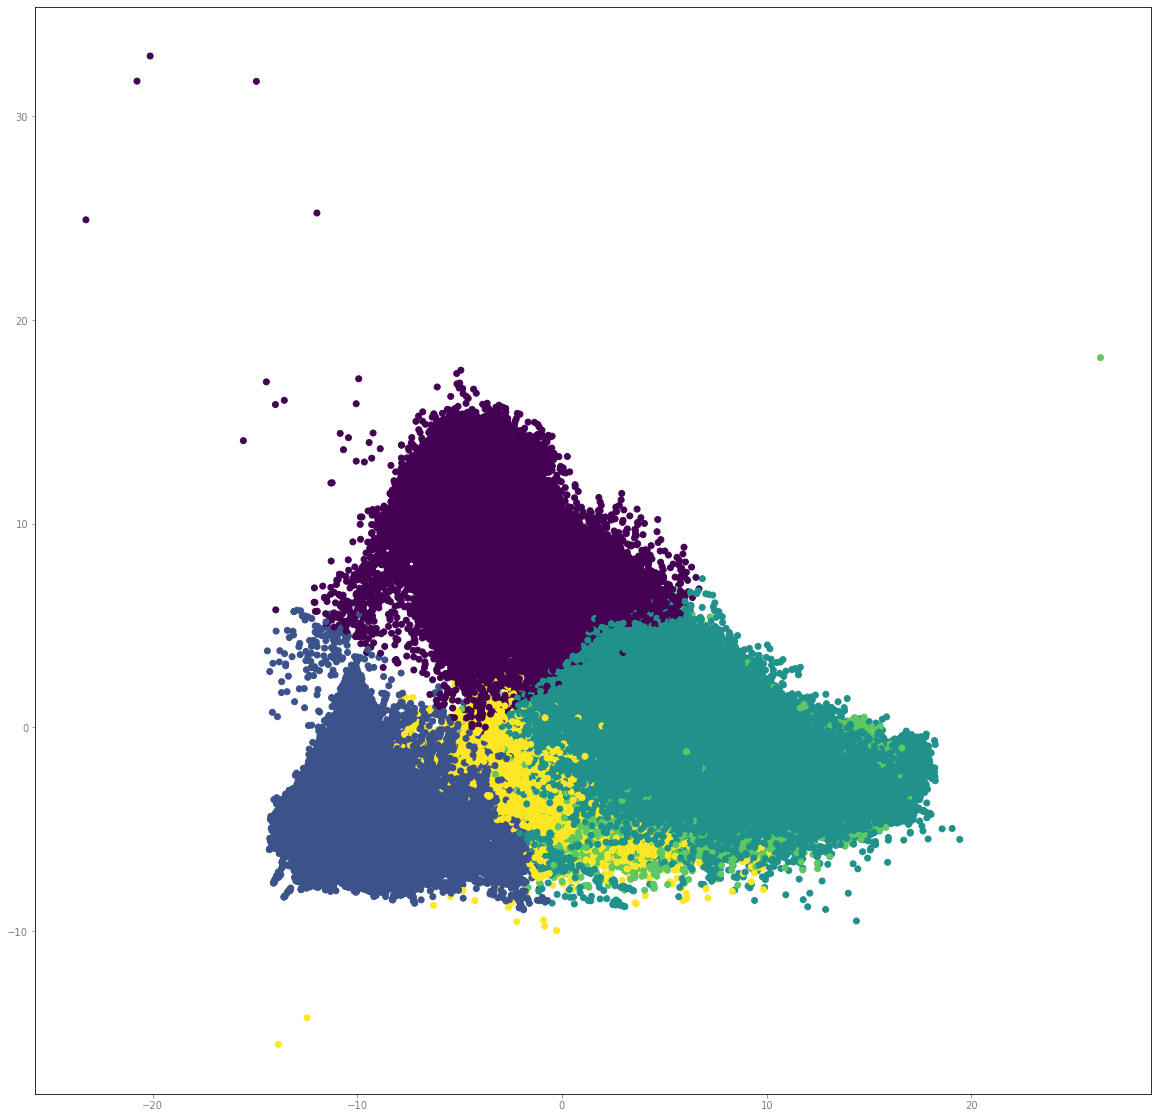

In [268]:
kmeans_pca = KMeans(n_clusters=5)
preds = kmeans_pca.fit_predict(X_scaled)

plt.figure(figsize=(20,20))
pca = PCA(n_components=2)
pc1, pc2 = zip(*pca.fit_transform(X_scaled))
plt.scatter(pc1, pc2, c=preds.tolist())
plt.show()

In [269]:
pca = PCA()
pca_data = pca.fit_transform(X_scaled)

In [270]:
per_var = np.round(pca.explained_variance_ratio_ *100, decimals=1)

In [271]:
ex_var = []
for i in per_var:
    if sum(ex_var) < 90:
        ex_var.append(i)
    

In [272]:
labels = ['PC' + str(x) for x in range(1,len(ex_var)+1)]

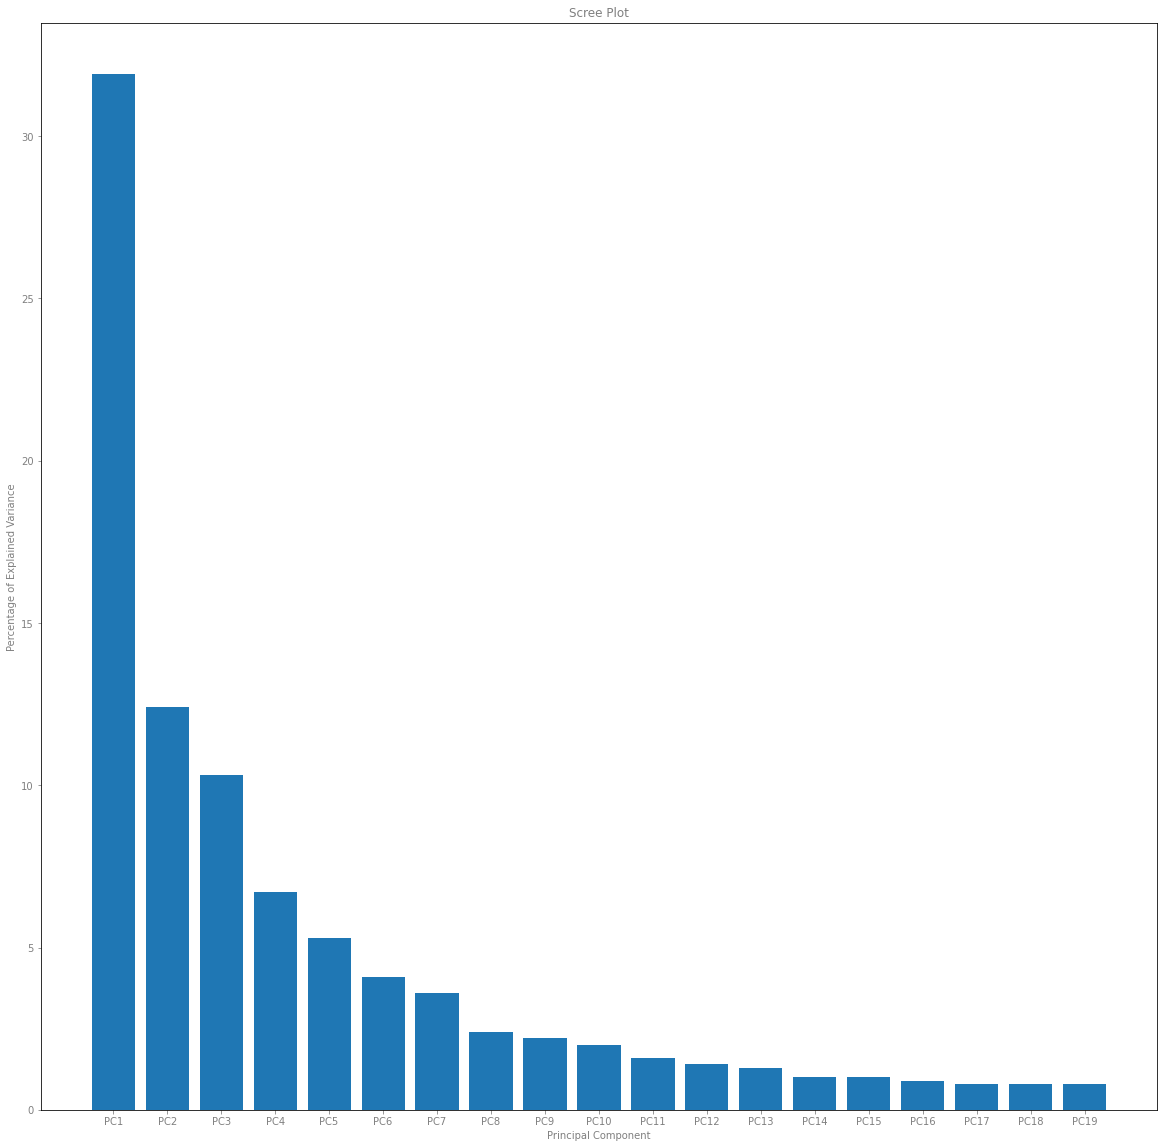

In [230]:
plt.figure(figsize=(20,20))
plt.bar(x=range(1,len(ex_var)+1), height=ex_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [273]:
num_principal_components = len(ex_var)

In [274]:
optimal_pca = PCA(n_components=num_principal_components)

X_pca = optimal_pca.fit_transform(X_scaled)

for i in ['index', False]:
    cross_tab(X_pca, y_smote, len(y_smote.unique()), norm=i)

StandardScaler()
Actual       Canola  Corn  Peas  Soybeans  Wheat_Oats
Predictions                                          
0              0.00  0.01  0.00      0.98        0.00
1              0.99  0.00  0.00      0.00        0.00
2              0.00  0.00  0.99      0.00        0.00
3              0.00  0.99  0.00      0.00        0.00
4              0.00  0.00  0.00      0.01        0.99
StandardScaler()
Actual       Canola    Corn    Peas  Soybeans  Wheat_Oats
Predictions                                              
0               500     324  131447       209         641
1                 8  129590     321       474         389
2            131116     422     381       305         260
3               477    1293      42    130449         467
4                90     562       0       754      130434


Train Test Split

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=19)

In [279]:
X_smote, y_smote = SMOTE(random_state=19).fit_resample(X_train, y_train)

In [280]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_smote)

pca = PCA()
pca_data = pca.fit_transform(X_scaled)

In [281]:
per_var = np.round(pca.explained_variance_ratio_ *100, decimals=1)

ex_var = []
for i in per_var:
    if sum(ex_var) < 90:
        ex_var.append(i)

num_principal_components = len(ex_var)

In [282]:
optimal_pca = PCA(n_components=num_principal_components)

X_pca = optimal_pca.fit_transform(X_scaled)